In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *

os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

# set initial parameters
M = 1e6
mu = 1e1
a = .2
p0 = 10.0
e0 = 0.7
iota0 = 0.
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 = 0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15
T = 0.001

# FEW 5PN AAK model

0.2
[10.          9.9999997   9.99999869  9.99999596  9.9999896   9.99997547
  9.99994089  9.99987929  9.99976404  9.99959012  9.99937391]
[0.7        0.69999997 0.69999988 0.69999962 0.69999902 0.69999769
 0.69999442 0.69998861 0.69997773 0.69996132 0.69994092]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:232: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."


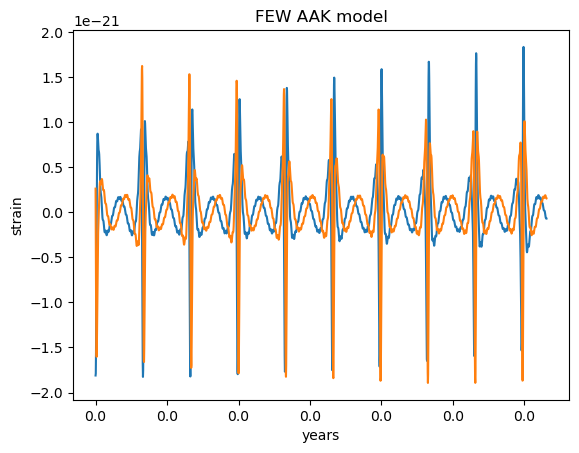

In [2]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wave_generator = Pn5AAKWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)
FEWwaveform = wave_generator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

t = np.arange(len(FEWwaveform)) * dt;
plt.plot(t, FEWwaveform.real);
plt.plot(t, FEWwaveform.imag);
plt.title("FEW AAK model");
ticks = plt.xticks()[0][1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
plt.xticks(ticks, newlabs);
plt.xlabel("years");
plt.ylabel("strain");

# My Model

In [3]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "npoints": 10,  # we want a densely sampled trajectory
    "dense_output": False
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wfgenerator = EMRIWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)

"""mywf = wfgenerator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

t = np.arange(len(mywf)) * dt
plt.plot(t, mywf.real);
plt.plot(t, mywf.imag);
plt.title("My model");
ticks = plt.xticks()[0][1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
plt.xticks(ticks, newlabs);
plt.xlabel("years");
plt.ylabel("strain");
""";

In [4]:
traj = wfgenerator.inspiral_generator(M,mu,a,10,0.7,1.,T=T,dt=dt, **inspiral_kwargs.copy())

In [5]:
import pyKerrFreqs
pyKerrFreqs.pyKerrGeoCoordinateFrequencies(a,10.,0.7,1.)

{'OmegaPhi': 0.014137738984117952,
 'OmegaTheta': 0.013945945574448733,
 'OmegaR': 0.009320032483731339}

In [6]:
[pyKerrFreqs.pyKerrGeoCoordinateFrequencies(a,*i) for i in list(zip(*[list(i) for i in traj[1:4]])) ];

In [ ]:
wfgenerator.create_waveform(traj[0], M,a,traj[1],traj[2],traj[3],traj[4],traj[5],traj[6], mu,qS,phiS,qK,phiK,dist, int(30 * e0),mich=mich,dt=1000,T=T)

# Mismatch

In [ ]:
print("mismatch between FEW AAK waveform and my waveform")
print(get_mismatch(FEWwaveform, mywf))

In [ ]:
st = 100000
stop = 101000
dom = t[st:stop]
ran1 = FEWwaveform.real[st:stop]
#ran2 = testwf.real[st:stop]
ran3 = mywf.real[st:stop]
plt.plot(dom,ran1, label="FEW waveform")
#plt.plot(dom, ran2, label="example PN waveform")
plt.plot(dom, ran3, label="my waveform");
ticks = plt.xticks()[0][1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*31))];
plt.xticks(ticks, newlabs);
plt.xlabel("months");
plt.ylabel("strain");